In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.2', 'qiskit-aer': '0.11.1', 'qiskit-ignis': '0.5.1', 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
import numpy as np
import time
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Getting started with Qiskit (The hello world of quantum computing)

Total count for 0 and 1 are: {'0': 49918, '1': 50082}
Time per single simulation is 0.96 microseconds


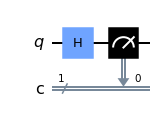

In [7]:
# Old qiskit style

circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure([0], [0])

simulator = QasmSimulator()
shots = 100_000
start = time.time()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(circuit)

print(f'Total count for 0 and 1 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw('mpl')

## 1 Creating Superposition using H Gate

Total count for 0 and 1 are: {'0': 49999, '1': 50001}
Time per single simulation is 0.93 microseconds


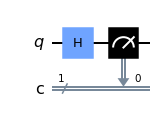

In [13]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure([0], [0])

simulator = QasmSimulator()
shots = 100_000
compiled_circuit = transpile(circuit, simulator)
start = time.time()
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(compiled_circuit)

print(f'Total count for 0 and 1 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw('mpl')

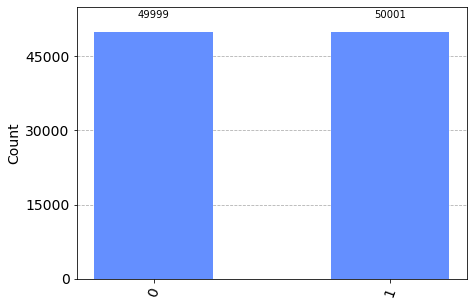

In [14]:
plot_histogram(counts)

## 2 Creating Bell Pair Entanglement using H Gate and CNOT Gate

https://qiskit.org/documentation/getting_started.html

Total count for 00 and 11 are: {'00': 50159, '11': 49841}
Time per single simulation is 1.18 microseconds


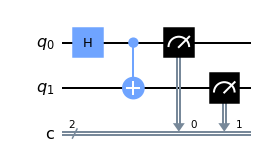

In [11]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
shots = 100_000
start = time.time()
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(compiled_circuit)

print(f'Total count for 00 and 11 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw('mpl')

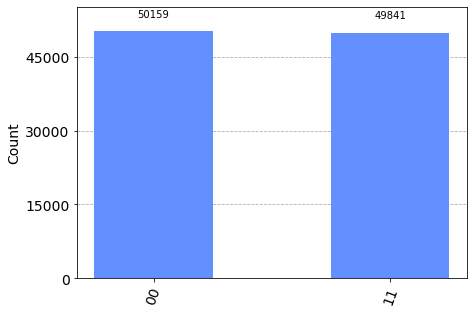

In [12]:
plot_histogram(counts)

## 3 Creating GHZ Entanglement using H Gate and Two CNOT Gates
https://qiskit.org/documentation/apidoc/circuit.html

Total count for 000 and 111 are: {'000': 50198, '111': 49802}
Time per single simulation is 1.54 microseconds


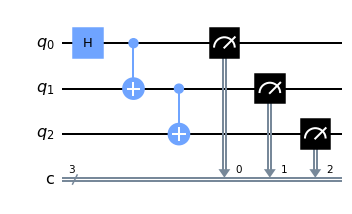

In [9]:
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
shots = 100_000
start = time.time()
job = simulator.run(compiled_circuit, shots = shots)
result = job.result()
elapse = time.time() - start
counts = result.get_counts(compiled_circuit)

print(f'Total count for 000 and 111 are: {counts}')
print(f'Time per single simulation is {elapse/shots*1e6:.2f} microseconds')
circuit.draw('mpl')

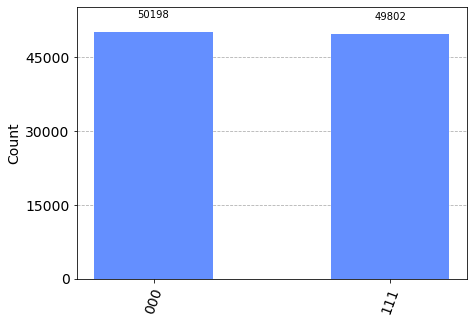

In [10]:
plot_histogram(counts)